# Simple GSEA Examples

In this notebook we will explore some typical usage of GSEA.

# GSEA Extreme Example

In this example we evaluate the enrichment of a custom gene set on the Triple Negative BRCA dataset used on the last differential expression exercise. Note that this is a real yet extremely uncommon result, we are using this example to illustrate how do GSEA output look with an extreme "positive control" experiment.

In [20]:
# Requires GenePattern Notebook: pip install genepattern-notebook
import gp
import genepattern

# Username and password removed for security reasons.
genepattern.display(genepattern.session.register("https://cloud.genepattern.org/gp", "", ""))

GPAuthWidget()

## Run GSEA

<div class="alert alert-info">
<h3 style="margin-top: 0;"> Instructions <i class="fa fa-info-circle"></i></h3>
1. Run GSEA to compute the enrichment of the recently created gene set. Note that the required files are provided below. Use the following parameters:  
&nbsp;&nbsp;&nbsp;- **Expression dataset**:  Select `brca_primary_all.gct` from the drop-down menu.  
&nbsp;&nbsp;&nbsp;- **gene sets database**: Select `custom_set.gmt` from the drop-down menu.  
&nbsp;&nbsp;&nbsp;- **phenotype labels**: Select `triple_negative.cls` from the drop-down menu.  
&nbsp;&nbsp;&nbsp;- **permutation type**: gene_set.  
&nbsp;&nbsp;&nbsp;- **collapse dataset**: false.    
&nbsp;&nbsp;&nbsp;- Click on the + symbon on `Advanced parameters` to show some more parameters.  
&nbsp;&nbsp;&nbsp;- **min gene set size**: Check that this is set to 10.  
2. Click **Run** and wait for the module to finish.  
3. Look at one of the GSEA outputs: In the subheader `Enrichment in phenotype: TripleNegative_BRCA (105 samples)` click on `Snapshot of enrichment results` and then click on the only image displayed.
</div>

In [21]:
file_list = ["https://datasets.genepattern.org/data/TCGA_BRCA/GSEA/brca_primary_all.gct",
             "https://datasets.genepattern.org/data/TCGA_BRCA/GSEA/custom_set.gmt",
             "https://datasets.genepattern.org/data/TCGA_BRCA/GSEA/triple_negative.cls"
            ]
genepattern.GPUIOutput(files=file_list, text="These URLS are provided here so they load easily throught this notebook's exercises")

UIOutput(files=['https://datasets.genepattern.org/data/TCGA_BRCA/GSEA/brca_primary_all.gct', 'https://datasets…

In [18]:
gsea_task = gp.GPTask(genepattern.session.get(0), 'urn:lsid:broad.mit.edu:cancer.software.genepattern.module.analysis:00072')
gsea_job_spec = gsea_task.make_job_spec()
gsea_job_spec.set_parameter("expression.dataset", "")
gsea_job_spec.set_parameter("gene.sets.database", "")
gsea_job_spec.set_parameter("number.of.permutations", "1000")
gsea_job_spec.set_parameter("phenotype.labels", "")
gsea_job_spec.set_parameter("target.profile", "")
gsea_job_spec.set_parameter("collapse.dataset", "false")
gsea_job_spec.set_parameter("permutation.type", "gene_set")
gsea_job_spec.set_parameter("chip.platform.file", "")
gsea_job_spec.set_parameter("scoring.scheme", "weighted")
gsea_job_spec.set_parameter("metric.for.ranking.genes", "Signal2Noise")
gsea_job_spec.set_parameter("gene.list.sorting.mode", "real")
gsea_job_spec.set_parameter("gene.list.ordering.mode", "descending")
gsea_job_spec.set_parameter("max.gene.set.size", "500")
gsea_job_spec.set_parameter("min.gene.set.size", "10")
gsea_job_spec.set_parameter("collapsing.mode.for.probe.sets.with.more.than.one.match", "Max_probe")
gsea_job_spec.set_parameter("normalization.mode", "meandiv")
gsea_job_spec.set_parameter("randomization.mode", "no_balance")
gsea_job_spec.set_parameter("omit.features.with.no.symbol.match", "true")
gsea_job_spec.set_parameter("make.detailed.gene.set.report", "true")
gsea_job_spec.set_parameter("median.for.class.metrics", "false")
gsea_job_spec.set_parameter("number.of.markers", "100")
gsea_job_spec.set_parameter("plot.graphs.for.the.top.sets.of.each.phenotype", "20")
gsea_job_spec.set_parameter("random.seed", "timestamp")
gsea_job_spec.set_parameter("save.random.ranked.lists", "false")
gsea_job_spec.set_parameter("create.svgs", "false")
gsea_job_spec.set_parameter("selected.gene.sets", "")
gsea_job_spec.set_parameter("output.file.name", "<expression.dataset_basename>.zip")
gsea_job_spec.set_parameter("alt.delim", "")
gsea_job_spec.set_parameter("create.zip", "true")
gsea_job_spec.set_parameter("create.gcts", "false")
gsea_job_spec.set_parameter("dev.mode", "false")
gsea_job_spec.set_parameter("job.memory", "8 Gb")
gsea_job_spec.set_parameter("job.queue", "gpbeta-default")
gsea_job_spec.set_parameter("job.cpuCount", "1")
gsea_job_spec.set_parameter("job.walltime", "02:00:00")
genepattern.display(gsea_task)

GPTaskWidget(lsid='urn:lsid:broad.mit.edu:cancer.software.genepattern.module.analysis:00072')

## Results interpretation

You should see a result similar to this:

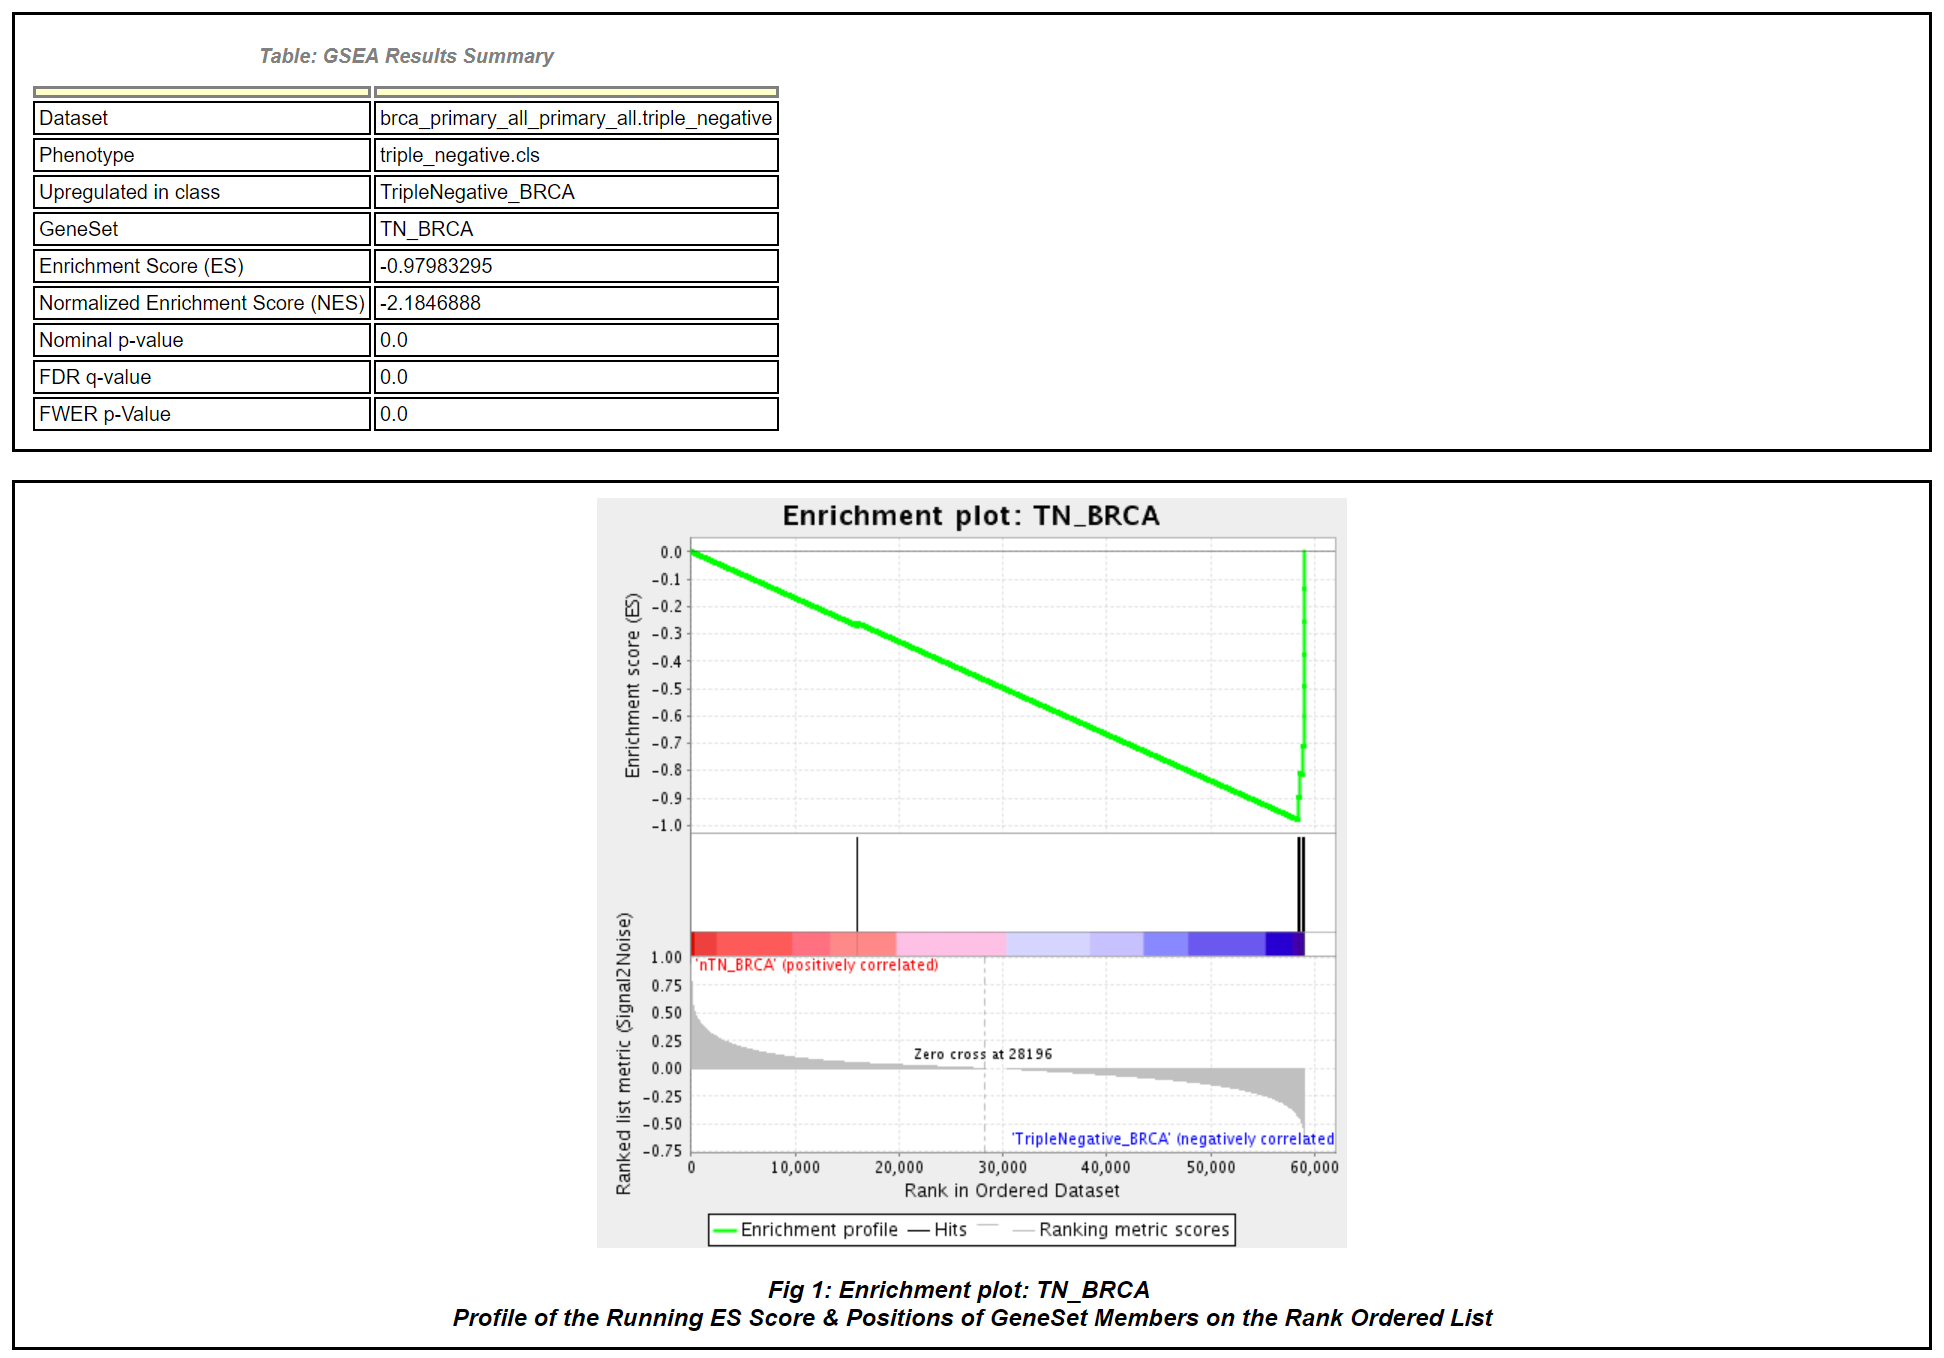

Note that only the top part of the output is being shown in the image above, this is called the **Mountain Plot** and it is used to visualize in which phenotype a given gene set is enriched.  

This example is extreme, because effectively all of the genes of interest are hihgly overexpressed on one phenotype leading to this almost triangular-looking mountain plot. Look at some other mountain plots in the exercise below and turn back to the presenter for more details on GSEA.

# Running GSEA with a Public Gene Set Collection

<!--
<div class="well well-sm">
More info here: http://software.broadinstitute.org/gsea/msigdb/cards/HALLMARK_KRAS_SIGNALING_UP.html  
And here http://software.broadinstitute.org/gsea/msigdb/cards/HALLMARK_KRAS_SIGNALING_DN.html
</div>
-->
<div class="alert alert-info">
<h3 style="margin-top: 0;"> Instructions <i class="fa fa-info-circle"></i></h3>
Run GSEA to compute the enrichment of the recently created gene set. Note that the required files are provided below. Use the following parameters:  
&nbsp;&nbsp;&nbsp;- **Expression dataset**:  Select `brca_primary_all.gct` from the drop-down menu.  
&nbsp;&nbsp;&nbsp;- **gene sets database**: Select `h.all.v6.2.symbols.gmt [Hallmarks]` from the drop-down menu.  
&nbsp;&nbsp;&nbsp;- **phenotype labels**: Select `triple_negative.cls` from the drop-down menu.  
&nbsp;&nbsp;&nbsp;- **permutation type**: gene_set.  
&nbsp;&nbsp;&nbsp;- **collapse dataset**: false.  

Look at the outputs of GSEA (click on `Snapshot of enrichment results` for the phenotype you are interested) and compare to the resutls from the first exercise. Below you will find a short explanation of some key differences.
</div>

<div class="well well-sm">
2 minutes from "Running"
</div>

In [19]:
gsea_task = gp.GPTask(genepattern.session.get(0), 'urn:lsid:broad.mit.edu:cancer.software.genepattern.module.analysis:00072')
gsea_job_spec = gsea_task.make_job_spec()
gsea_job_spec.set_parameter("expression.dataset", "")
gsea_job_spec.set_parameter("gene.sets.database", "")
gsea_job_spec.set_parameter("number.of.permutations", "1000")
gsea_job_spec.set_parameter("phenotype.labels", "")
gsea_job_spec.set_parameter("target.profile", "")
gsea_job_spec.set_parameter("collapse.dataset", "false")
gsea_job_spec.set_parameter("permutation.type", "gene_set")
gsea_job_spec.set_parameter("chip.platform.file", "")
gsea_job_spec.set_parameter("scoring.scheme", "weighted")
gsea_job_spec.set_parameter("metric.for.ranking.genes", "Signal2Noise")
gsea_job_spec.set_parameter("gene.list.sorting.mode", "real")
gsea_job_spec.set_parameter("gene.list.ordering.mode", "descending")
gsea_job_spec.set_parameter("max.gene.set.size", "500")
gsea_job_spec.set_parameter("min.gene.set.size", "15")
gsea_job_spec.set_parameter("collapsing.mode.for.probe.sets.with.more.than.one.match", "Max_probe")
gsea_job_spec.set_parameter("normalization.mode", "meandiv")
gsea_job_spec.set_parameter("randomization.mode", "no_balance")
gsea_job_spec.set_parameter("omit.features.with.no.symbol.match", "true")
gsea_job_spec.set_parameter("make.detailed.gene.set.report", "true")
gsea_job_spec.set_parameter("median.for.class.metrics", "false")
gsea_job_spec.set_parameter("number.of.markers", "100")
gsea_job_spec.set_parameter("plot.graphs.for.the.top.sets.of.each.phenotype", "20")
gsea_job_spec.set_parameter("random.seed", "timestamp")
gsea_job_spec.set_parameter("save.random.ranked.lists", "false")
gsea_job_spec.set_parameter("create.svgs", "false")
gsea_job_spec.set_parameter("selected.gene.sets", "")
gsea_job_spec.set_parameter("output.file.name", "<expression.dataset_basename>.zip")
gsea_job_spec.set_parameter("alt.delim", "")
gsea_job_spec.set_parameter("create.zip", "true")
gsea_job_spec.set_parameter("create.gcts", "false")
gsea_job_spec.set_parameter("dev.mode", "false")
gsea_job_spec.set_parameter("job.memory", "8 Gb")
gsea_job_spec.set_parameter("job.queue", "gpbeta-default")
gsea_job_spec.set_parameter("job.cpuCount", "1")
gsea_job_spec.set_parameter("job.walltime", "02:00:00")
genepattern.display(gsea_task)

GPTaskWidget(lsid='urn:lsid:broad.mit.edu:cancer.software.genepattern.module.analysis:00072')

## Results interpretation

Note that in this example there are more gene sets and both phenotypes have enriched gene sets. Particularly, look at Note that the Estrogen Response gene sets (HALLMARK_ESTROGEN_RESPONSE_EARLY and HLLMARK_ESTROGEN_RESPONSE_LATE) are highly enriched in non-Triplie Negative BRCA. This is consistent with our prior knowledge since triple negative cancer samples lack estrogen receptors, therefore we would expect estrogen response gene sets to be enriched in the non-triple negative phenotype.

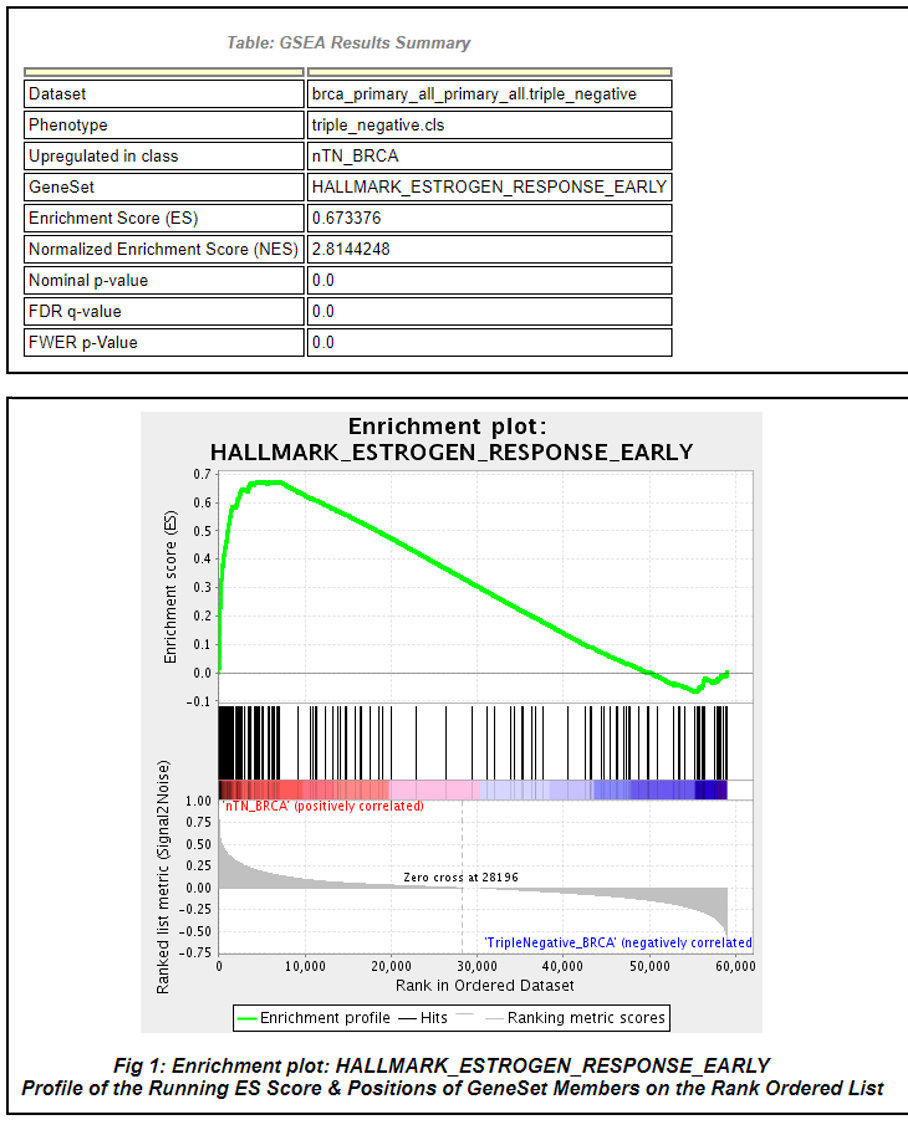